In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import sklearn

import sys,os

import xgboost
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

pd.set_option("display.max_columns",200)

# Data Read

In [2]:
train_data_path = '../data/train.csv'
test_data_path = '../data/test.csv'

In [3]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
print(train_data.shape,test_data.shape)

(1460, 81) (1459, 80)


In [4]:
train_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
test_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [6]:
## Checking datatypes for all columns
d_type_dict = {}

for col in train_data.columns:
    d_type_dict[col] = str(train_data[col].dtypes)

print(([str(i) for i in train_data.dtypes.unique()]))
d_type_dict

['int64', 'object', 'float64']


{'Id': 'int64',
 'MSSubClass': 'int64',
 'MSZoning': 'object',
 'LotFrontage': 'float64',
 'LotArea': 'int64',
 'Street': 'object',
 'Alley': 'object',
 'LotShape': 'object',
 'LandContour': 'object',
 'Utilities': 'object',
 'LotConfig': 'object',
 'LandSlope': 'object',
 'Neighborhood': 'object',
 'Condition1': 'object',
 'Condition2': 'object',
 'BldgType': 'object',
 'HouseStyle': 'object',
 'OverallQual': 'int64',
 'OverallCond': 'int64',
 'YearBuilt': 'int64',
 'YearRemodAdd': 'int64',
 'RoofStyle': 'object',
 'RoofMatl': 'object',
 'Exterior1st': 'object',
 'Exterior2nd': 'object',
 'MasVnrType': 'object',
 'MasVnrArea': 'float64',
 'ExterQual': 'object',
 'ExterCond': 'object',
 'Foundation': 'object',
 'BsmtQual': 'object',
 'BsmtCond': 'object',
 'BsmtExposure': 'object',
 'BsmtFinType1': 'object',
 'BsmtFinSF1': 'int64',
 'BsmtFinType2': 'object',
 'BsmtFinSF2': 'int64',
 'BsmtUnfSF': 'int64',
 'TotalBsmtSF': 'int64',
 'Heating': 'object',
 'HeatingQC': 'object',
 'CentralAi

# Exploratory Data Analysis

In [7]:
#Only 3 type of data Float , int: (Numeric)  Object : str
#EDA will be different for Numerics (outliers,missing values , correlations)
#EDA for object cols will be around mode values ,missing values

### Missing Value Treatment

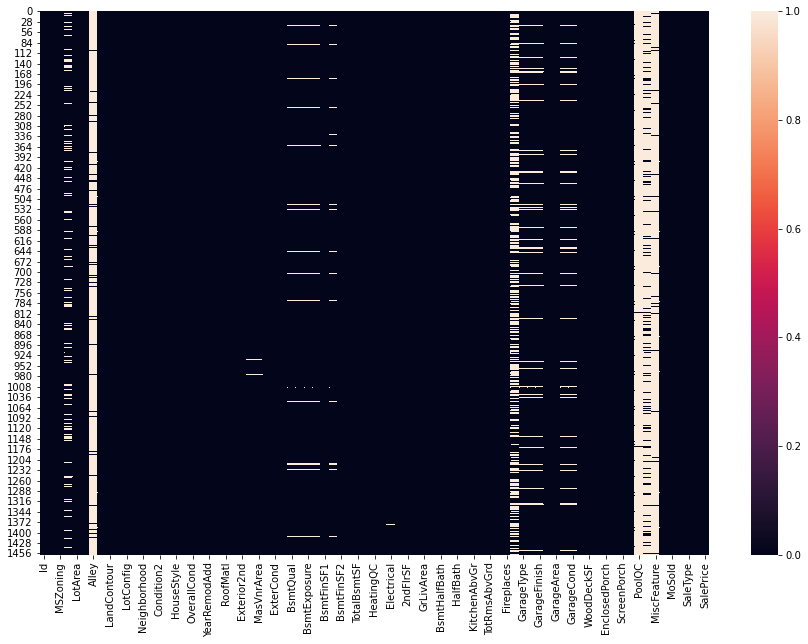

In [8]:
#checking missing Values
plt.figure(figsize=(15,10))
sns.heatmap(train_data.isna(),cbar=True)
plt.show()

In [9]:
## Columns Alley , PoolQC , MiscFeature Fireplaces have huge missing Values

In [10]:
test_data.isna().sum()['Id']

0

In [11]:
train_data_miss = {}
test_data_miss = {}

for col in train_data.columns:
    #print(col)
    train_data_miss[col] = train_data[col].isna().sum()*100/train_data.shape[0]
    if col in test_data.columns:
        test_data_miss[col] = test_data[col].isna().sum()*100/test_data.shape[0]
        
print("Train_Miss:\n",train_data_miss)
print("Test_Miss:\n",train_data_miss)

Train_Miss:
 {'Id': 0.0, 'MSSubClass': 0.0, 'MSZoning': 0.0, 'LotFrontage': 17.73972602739726, 'LotArea': 0.0, 'Street': 0.0, 'Alley': 93.76712328767124, 'LotShape': 0.0, 'LandContour': 0.0, 'Utilities': 0.0, 'LotConfig': 0.0, 'LandSlope': 0.0, 'Neighborhood': 0.0, 'Condition1': 0.0, 'Condition2': 0.0, 'BldgType': 0.0, 'HouseStyle': 0.0, 'OverallQual': 0.0, 'OverallCond': 0.0, 'YearBuilt': 0.0, 'YearRemodAdd': 0.0, 'RoofStyle': 0.0, 'RoofMatl': 0.0, 'Exterior1st': 0.0, 'Exterior2nd': 0.0, 'MasVnrType': 0.547945205479452, 'MasVnrArea': 0.547945205479452, 'ExterQual': 0.0, 'ExterCond': 0.0, 'Foundation': 0.0, 'BsmtQual': 2.5342465753424657, 'BsmtCond': 2.5342465753424657, 'BsmtExposure': 2.6027397260273974, 'BsmtFinType1': 2.5342465753424657, 'BsmtFinSF1': 0.0, 'BsmtFinType2': 2.6027397260273974, 'BsmtFinSF2': 0.0, 'BsmtUnfSF': 0.0, 'TotalBsmtSF': 0.0, 'Heating': 0.0, 'HeatingQC': 0.0, 'CentralAir': 0.0, 'Electrical': 0.0684931506849315, '1stFlrSF': 0.0, '2ndFlrSF': 0.0, 'LowQualFinSF': 

In [12]:
missing_tolerance = 30

#checking if same col are crossing the tolerence in test data and train data
print("Test Data Columns crossing tolerence: ")
for i in test_data_miss.keys():
    if test_data_miss[i] > missing_tolerance:
        print(i,":",test_data_miss[i],end=" ;")
        
print("\nTrain Data Columns crossing tolerence: ")
for i in train_data_miss.keys():
    if train_data_miss[i] > missing_tolerance:
        print(i,":",train_data_miss[i],end=" ;")
    

Test Data Columns crossing tolerence: 
Alley : 92.66620973269363 ;FireplaceQu : 50.03427004797807 ;PoolQC : 99.7943797121316 ;Fence : 80.12337217272105 ;MiscFeature : 96.50445510623715 ;
Train Data Columns crossing tolerence: 
Alley : 93.76712328767124 ;FireplaceQu : 47.26027397260274 ;PoolQC : 99.52054794520548 ;Fence : 80.75342465753425 ;MiscFeature : 96.3013698630137 ;

In [13]:
#As both lists have same columns with more than 30%missing values we can drop the columns from both datasets
for i in test_data_miss.keys():
    
    if test_data_miss[i] > missing_tolerance:
        print(f'Dropping {i} from Test Data' )
        test_data.drop(i,axis='columns',inplace=True)
        
for i in train_data_miss.keys():
    
    if train_data_miss[i] > missing_tolerance:
        print(f'Dropping {i} from Train Data' )
        train_data.drop(i,axis='columns',inplace=True)
        
[col for col in train_data.columns if col not in test_data.columns]

Dropping Alley from Test Data
Dropping FireplaceQu from Test Data
Dropping PoolQC from Test Data
Dropping Fence from Test Data
Dropping MiscFeature from Test Data
Dropping Alley from Train Data
Dropping FireplaceQu from Train Data
Dropping PoolQC from Train Data
Dropping Fence from Train Data
Dropping MiscFeature from Train Data


['SalePrice']

In [14]:
train_data.shape,test_data.shape

((1460, 76), (1459, 75))

### Missing Value Treatment

In [15]:

#Substituting Numerics with Median and objects with Mode.
for col in train_data.columns:
    if d_type_dict[col] == 'object':
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    else:
        train_data[col] = train_data[col].fillna(train_data[col].median())

for col in test_data.columns:
    if d_type_dict[col] == 'object':
        test_data[col] = test_data[col].fillna(test_data[col].mode()[0])
    else:
        test_data[col] = test_data[col].fillna(test_data[col].median())



In [16]:
[i for i in train_data.isna().sum().index if train_data.isna().sum()[i] > 0]

[]

In [17]:
[i for i in test_data.isna().sum().index if test_data.isna().sum()[i] > 0]

[]

In [18]:
print(train_data.shape,test_data.shape)

(1460, 76) (1459, 75)


In [19]:
#Checking Distribution in Test Data

MSZoning


<Figure size 432x288 with 0 Axes>

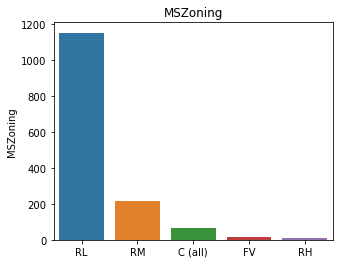

Street


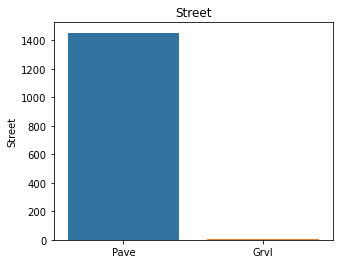

LotShape


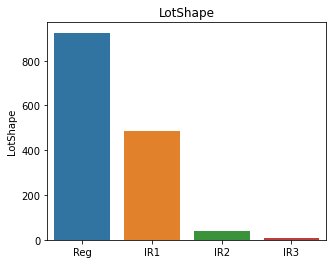

LandContour


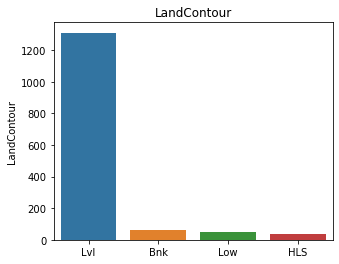

Utilities


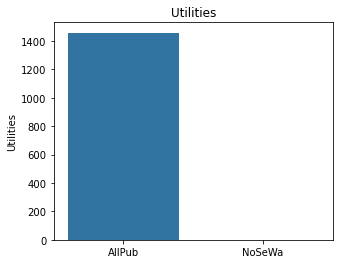

LotConfig


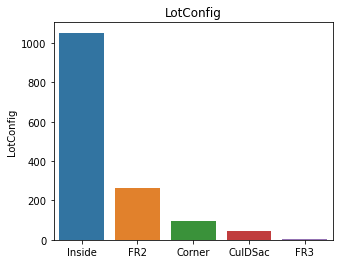

LandSlope


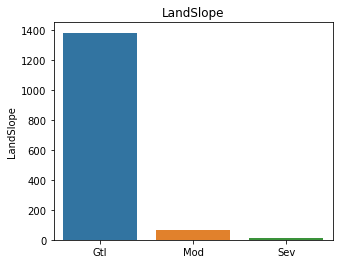

Neighborhood


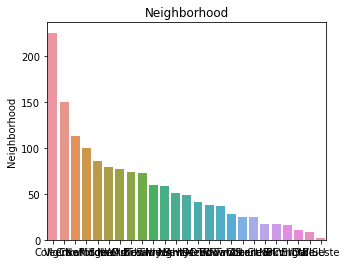

Condition1


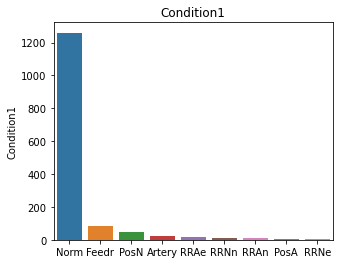

Condition2


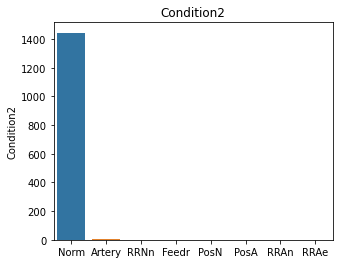

BldgType


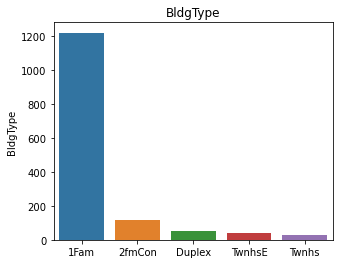

HouseStyle


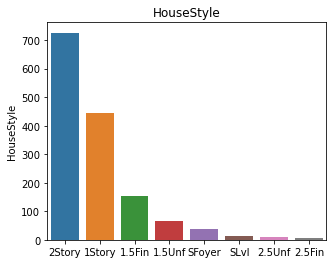

RoofStyle


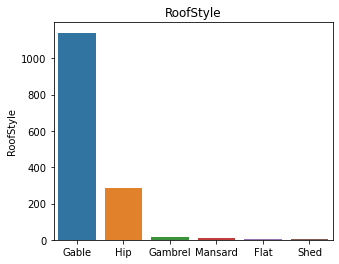

RoofMatl


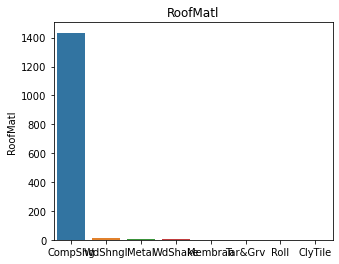

Exterior1st


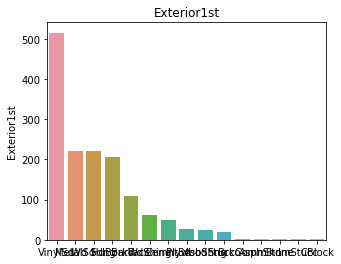

Exterior2nd


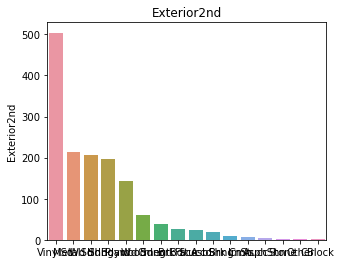

MasVnrType


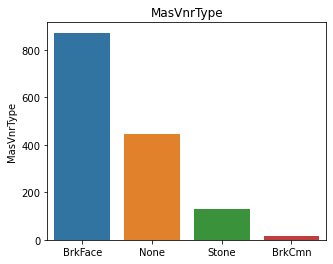

ExterQual


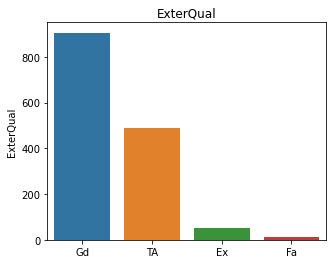

ExterCond


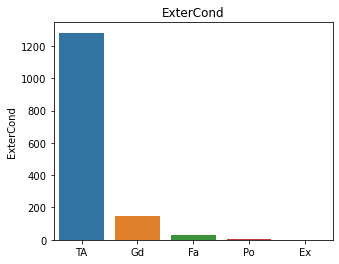

Foundation


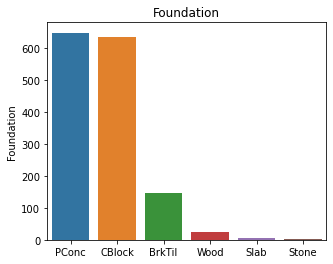

BsmtQual


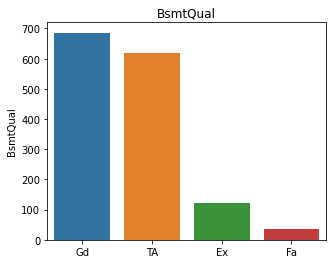

BsmtCond


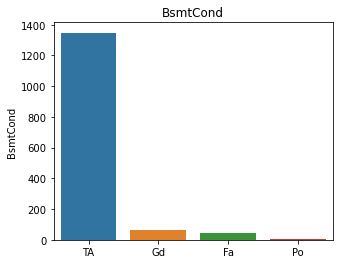

BsmtExposure


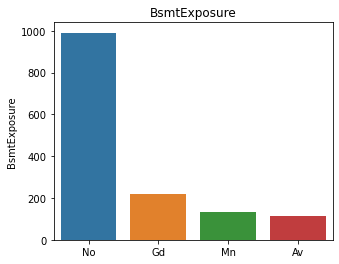

BsmtFinType1


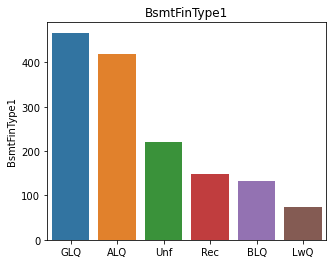

BsmtFinType2


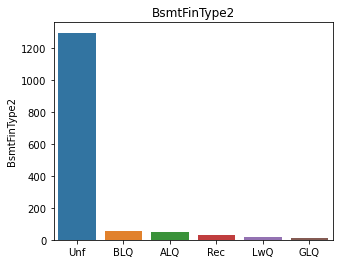

Heating


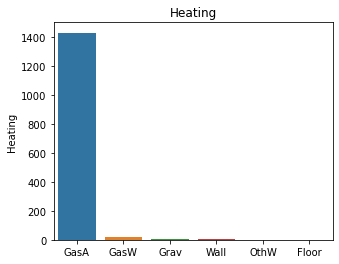

HeatingQC


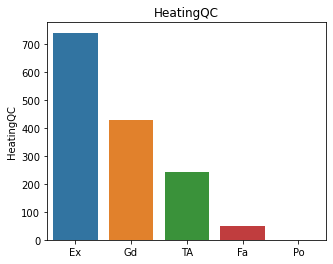

CentralAir


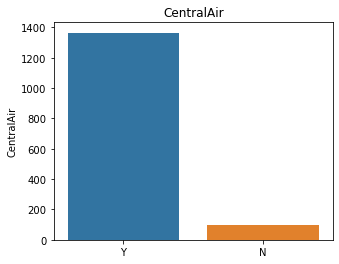

Electrical


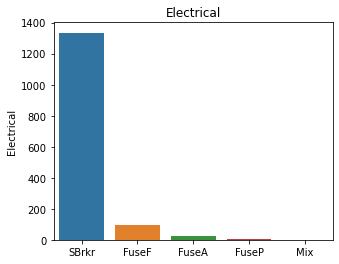

KitchenQual


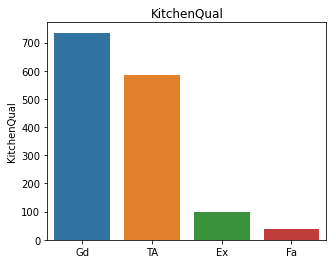

Functional


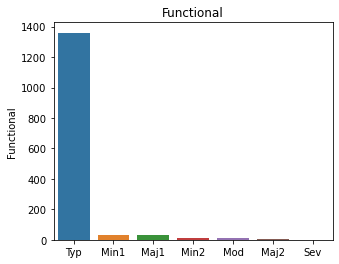

GarageType


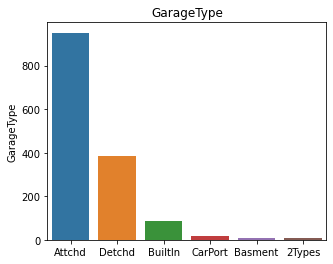

GarageFinish


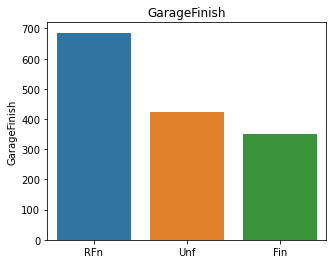

GarageQual


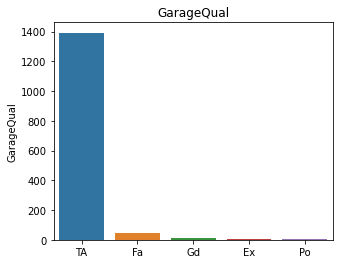

GarageCond


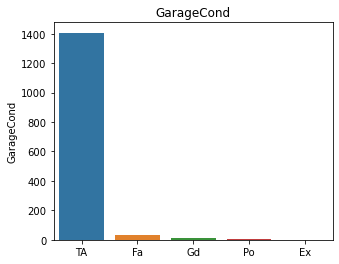

PavedDrive


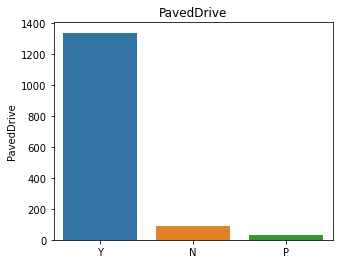

SaleType


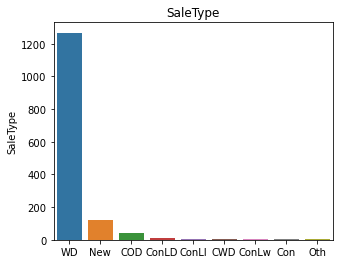

SaleCondition


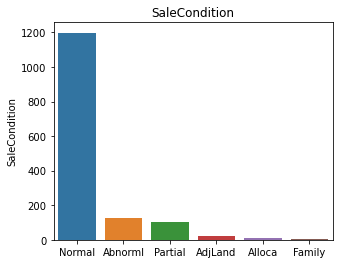

In [20]:

plt.figure()
for  i in train_data.columns:
    if d_type_dict[i] == 'object':
        print(i)
        plt.figure(figsize=(5,4))
        plt.title(i)
        sns.barplot(x=train_data[i].unique(),y=train_data[i].value_counts())
        plt.show()
        


In [21]:
##As Shown in the graphs most categories in various columns have only few values so can be groped to Other dummy category
## to reduce dimensionality after get_dummies
## analysis to be done on Train data and same operations to be performed on test data to maintain same shape

In [22]:
train_data.SaleType.value_counts()
train_data['SaleType'] = train_data['SaleType'].apply(lambda x : x.strip())
test_data['SaleType'] = test_data['SaleType'].apply(lambda x : x.strip())

train_data['SaleType'] = np.where(train_data['SaleType'].isin(['ConLD','ConLw','ConLI','CWD','Oth','Con']),'Others',train_data['SaleType'])
test_data['SaleType'] = np.where(test_data['SaleType'].isin(['ConLD','ConLw','ConLI','CWD','Oth','Con']),'Others',test_data['SaleType'])

print(train_data.SaleType.value_counts(), test_data.SaleType.value_counts())


WD        1267
New        122
COD         43
Others      28
Name: SaleType, dtype: int64 WD        1259
New        117
COD         44
Others      39
Name: SaleType, dtype: int64


In [23]:
train_data.GarageCond.value_counts()

train_data['GarageCond'] = train_data['GarageCond'].apply(lambda x : x.strip())
test_data['GarageCond'] = test_data['GarageCond'].apply(lambda x : x.strip())

train_data['GarageCond'] = np.where(train_data['GarageCond'].isin(['Gd','Po','Ex']),'Others',train_data['GarageCond'])
test_data['GarageCond'] = np.where(test_data['GarageCond'].isin(['Gd','Po','Ex']),'Others',test_data['GarageCond'])

print(train_data.GarageCond.value_counts(), test_data.GarageCond.value_counts())


TA        1407
Fa          35
Others      18
Name: GarageCond, dtype: int64 TA        1406
Fa          39
Others      14
Name: GarageCond, dtype: int64


In [24]:
train_data.GarageType.value_counts()

train_data['GarageType'] = train_data['GarageType'].apply(lambda x : x.strip())
test_data['GarageType'] = test_data['GarageType'].apply(lambda x : x.strip())

train_data['GarageType'] = np.where(train_data['GarageType'].isin(['CarPort','Basment','2Types']),'Others',train_data['GarageType'])
test_data['GarageType'] = np.where(test_data['GarageType'].isin(['CarPort','2Types','Basment']),'Others',test_data['GarageType'])

print(train_data.GarageType.value_counts(), test_data.GarageType.value_counts())


Attchd     951
Detchd     387
BuiltIn     88
Others      34
Name: GarageType, dtype: int64 Attchd     929
Detchd     392
BuiltIn     98
Others      40
Name: GarageType, dtype: int64


In [25]:
train_data.Functional.value_counts()

train_data['Functional'] = train_data['Functional'].apply(lambda x : x.strip())
test_data['Functional'] = test_data['Functional'].apply(lambda x : x.strip())

train_data['Functional'] = np.where(train_data['Functional'].isin(['Maj2','Maj1','Sev','Mod']),'Others',train_data['Functional'])
test_data['Functional'] = np.where(test_data['Functional'].isin(['Maj2','Maj1','Sev','Mod']),'Others',test_data['Functional'])

print(train_data.Functional.value_counts(), test_data.Functional.value_counts())


Typ       1360
Others      35
Min2        34
Min1        31
Name: Functional, dtype: int64 Typ       1359
Min2        36
Min1        34
Others      30
Name: Functional, dtype: int64


In [26]:
train_data.Heating.value_counts()
train_data['Heating'] = train_data['Heating'].apply(lambda x : x.strip())
test_data['Heating'] = test_data['Heating'].apply(lambda x : x.strip())

train_data['Heating'] = np.where(train_data['Heating'].isin(['Grav','GraW','Wall','OthW','Floor']),'Others',train_data['Heating'])
test_data['Heating'] = np.where(test_data['Heating'].isin(['Grav','GraW','Wall','OthW','Floor']),'Others',test_data['Heating'])

print(train_data.Heating.value_counts(), test_data.Heating.value_counts())


GasA      1428
GasW        18
Others      14
Name: Heating, dtype: int64 GasA      1446
GasW         9
Others       4
Name: Heating, dtype: int64


In [27]:
train_data.Exterior2nd.value_counts()

# #Exterior1st
# #train_data.Exterior2nd.value_counts()
# #For condtion Twoo all values other than Norm can be grouped to Others
train_data['Exterior2nd'] = train_data['Exterior2nd'].apply(lambda x : x.strip())
test_data['Exterior2nd'] = test_data['Exterior2nd'].apply(lambda x : x.strip())

train_data['Exterior2nd'] = np.where(train_data['Exterior2nd'].isin(['ImStucc','Brk Cmn','Stone','AsphShn','Other','CBlock']),'Others',train_data['Exterior2nd'])
test_data['Exterior2nd'] = np.where(test_data['Exterior2nd'].isin(['ImStucc','Brk Cmn','Stone','AsphShn','Other','CBlock']),'Others',test_data['Exterior2nd'])

print(train_data.Exterior2nd.value_counts(), test_data.Exterior2nd.value_counts())


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Others      27
Stucco      26
BrkFace     25
AsbShng     20
Name: Exterior2nd, dtype: int64 VinylSd    511
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
Others      24
BrkFace     22
Stucco      21
AsbShng     18
Name: Exterior2nd, dtype: int64


In [28]:
train_data.Exterior1st.value_counts()

#Exterior1st
#train_data.Exterior1st.value_counts()
#For condtion Twoo all values other than Norm can be grouped to Others
train_data['Exterior1st'] = train_data['Exterior1st'].apply(lambda x : x.strip())
test_data['Exterior1st'] = test_data['Exterior1st'].apply(lambda x : x.strip())

train_data['Exterior1st'] = np.where(train_data['Exterior1st'].isin(['Stone','BrkComm','CBlock','AsphShn','ImStucc']),'Others',train_data['Exterior1st'])
test_data['Exterior1st'] = np.where(test_data['Exterior1st'].isin(['Stone','BrkComm','CBlock','AsphShn','ImStucc']),'Others',test_data['Exterior1st'])

print(train_data.Exterior1st.value_counts(), test_data.Exterior1st.value_counts())


VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Others       7
Name: Exterior1st, dtype: int64 VinylSd    511
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
Others       6
Name: Exterior1st, dtype: int64


In [29]:
#RoofMatl
#train_data.RoofMatl.value_counts()
#For condtion Twoo all values other than Norm can be grouped to Others
train_data['RoofMatl'] = train_data['RoofMatl'].apply(lambda x : x.strip())
test_data['RoofMatl'] = test_data['RoofMatl'].apply(lambda x : x.strip())

train_data['RoofMatl'] = np.where(train_data['RoofMatl'].isin(['WdShngl','WdShake','Membran','Metal','ClyTile','Roll']),'Others',train_data['RoofMatl'])
test_data['RoofMatl'] = np.where(test_data['RoofMatl'].isin(['WdShngl','WdShake','Membran','Metal','ClyTile','Roll']),'Others',test_data['RoofMatl'])

print(train_data.RoofMatl.value_counts(), test_data.RoofMatl.value_counts())


CompShg    1434
Others       15
Tar&Grv      11
Name: RoofMatl, dtype: int64 CompShg    1442
Tar&Grv      12
Others        5
Name: RoofMatl, dtype: int64


In [30]:
#For condtion Twoo all values other than Norm can be grouped to Others
train_data['Condition1'] = train_data['Condition1'].apply(lambda x : x.strip())
test_data['Condition1'] = test_data['Condition1'].apply(lambda x : x.strip())

train_data['Condition1'] = np.where(train_data['Condition1'].isin(['RRNn','PosA','RRNe','RRAe']),'Others',train_data['Condition1'])
test_data['Condition1'] = np.where(test_data['Condition1'].isin(['RRNn','PosA','RRNe','RRAe']),'Others',test_data['Condition1'])

print(train_data.Condition1.value_counts(), test_data.Condition1.value_counts())


Norm      1260
Feedr       81
Artery      48
Others      26
RRAn        26
PosN        19
Name: Condition1, dtype: int64 Norm      1251
Feedr       83
Artery      44
Others      37
RRAn        24
PosN        20
Name: Condition1, dtype: int64


In [31]:
#For condtion Twoo all values other than Norm can be grouped to Others
train_data['Condition2'] = train_data['Condition2'].apply(lambda x : x.strip())
test_data['Condition2'] = test_data['Condition2'].apply(lambda x : x.strip())

train_data['Condition2'] = np.where(train_data['Condition2']!='Norm','Others',train_data['Condition2'])
test_data['Condition2'] = np.where(test_data['Condition2']!='Norm','Others',test_data['Condition2'])

print(train_data.Condition2.value_counts(), test_data.Condition2.value_counts())

Norm      1445
Others      15
Name: Condition2, dtype: int64 Norm      1444
Others      15
Name: Condition2, dtype: int64


In [32]:
# print(train_data.MSZoning.value_counts())
# #grouping RH and C (all) to Others
train_data['MSZoning'] = np.where(np.logical_or(train_data['MSZoning']=='RH' , train_data['MSZoning']=='C (all)'),'Others',train_data['MSZoning'])
test_data['MSZoning'] = np.where(np.logical_or(test_data['MSZoning']=='RH' , test_data['MSZoning']=='C (all)'),'Others',test_data['MSZoning'])
print(train_data.MSZoning.value_counts())
print(test_data.MSZoning.value_counts())

RL        1151
RM         218
FV          65
Others      26
Name: MSZoning, dtype: int64
RL        1118
RM         242
FV          74
Others      25
Name: MSZoning, dtype: int64


In [33]:
#Blueste and NPKVill and Veenker can be grouped to single Others (have less than 1% values)
train_data['Neighborhood'] = train_data.Neighborhood.apply(lambda x : x.strip())
test_data['Neighborhood'] = test_data.Neighborhood.apply(lambda x : x.strip())
train_data['Neighborhood'] = np.where(train_data['Neighborhood'].isin(['Blueste','NPkVill','Veenker']),'Others',train_data['Neighborhood'])
test_data['Neighborhood'] = np.where(test_data['Neighborhood'].isin(['Blueste','NPkVill','Veenker']),'Others',test_data['Neighborhood'])
print(train_data.Neighborhood.value_counts())
print(test_data.Neighborhood.value_counts())

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Others      22
Blmngtn     17
MeadowV     17
BrDale      16
Name: Neighborhood, dtype: int64
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Others      35
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
Blmngtn     11
Name: Neighborhood, dtype: int64


In [34]:
train_data.shape , test_data.shape

((1460, 76), (1459, 75))

In [35]:
### Numerical Columns

Id


<Figure size 432x288 with 0 Axes>

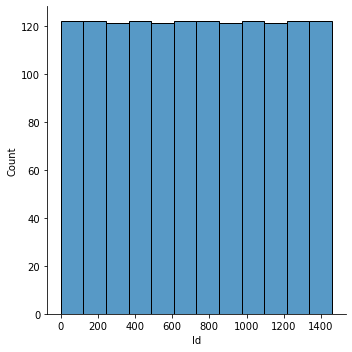

MSSubClass


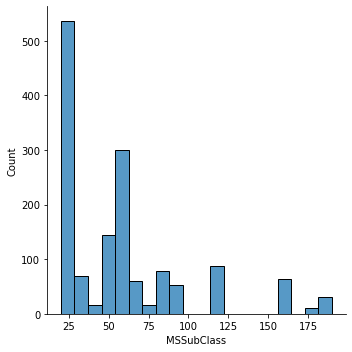

LotFrontage


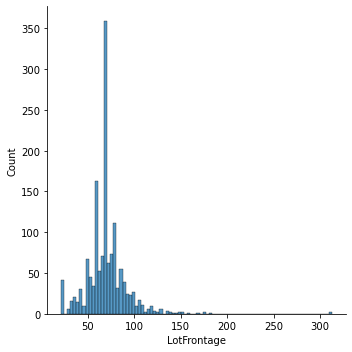

LotArea


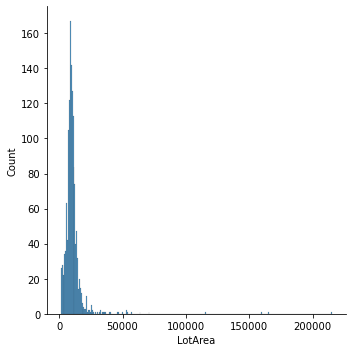

OverallQual


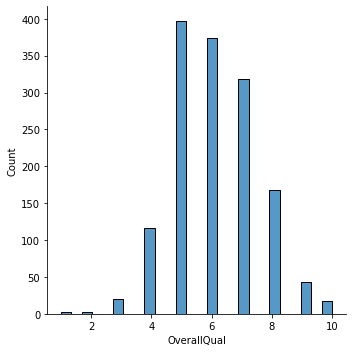

OverallCond


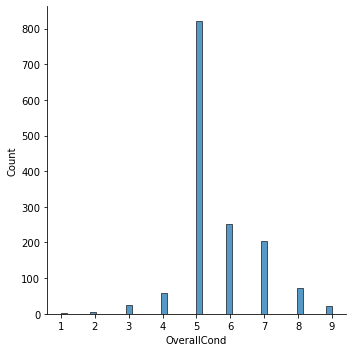

YearBuilt


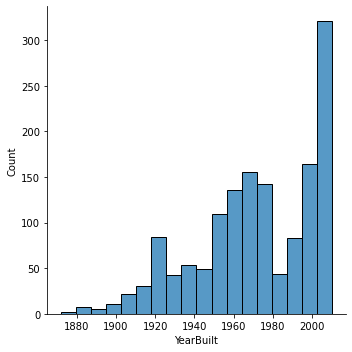

YearRemodAdd


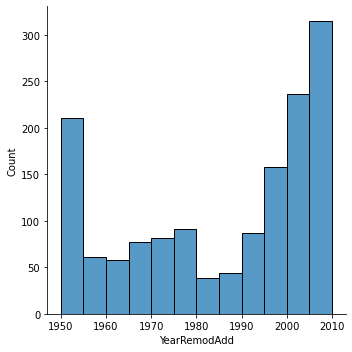

MasVnrArea


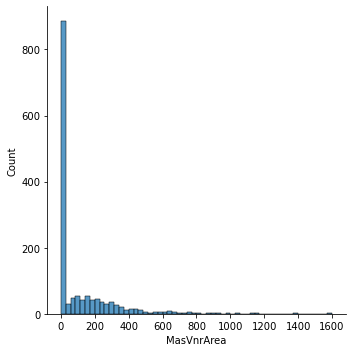

BsmtFinSF1


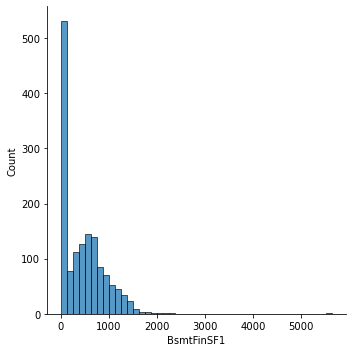

BsmtFinSF2


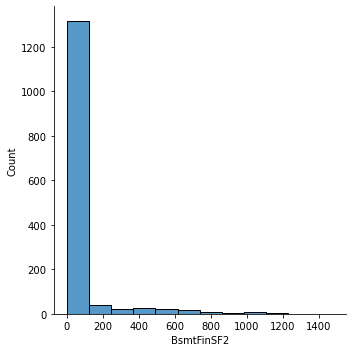

BsmtUnfSF


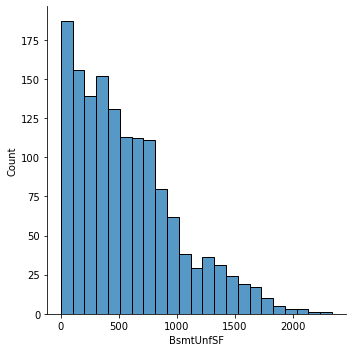

TotalBsmtSF


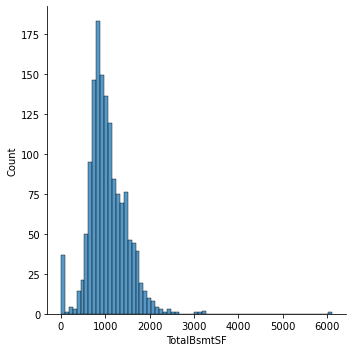

1stFlrSF


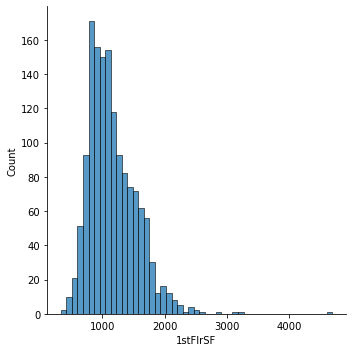

2ndFlrSF


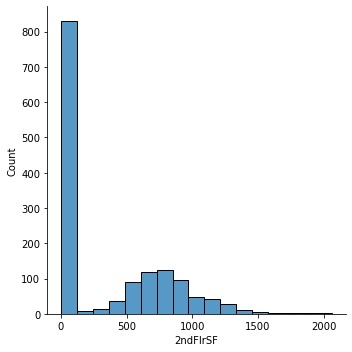

LowQualFinSF


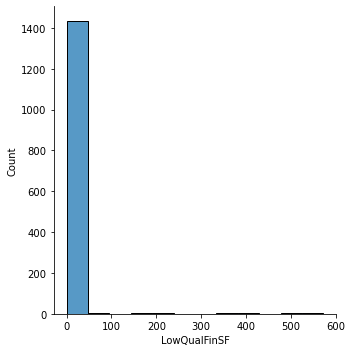

GrLivArea


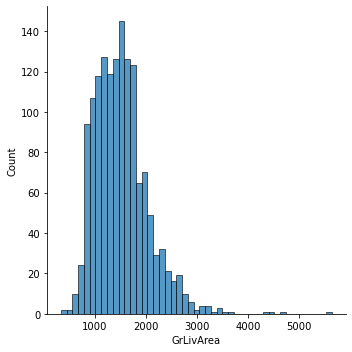

BsmtFullBath


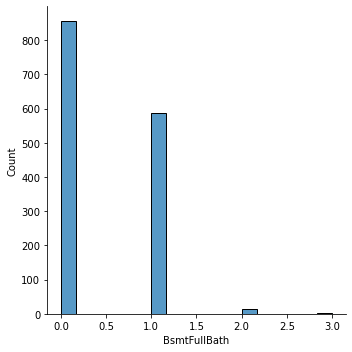

BsmtHalfBath


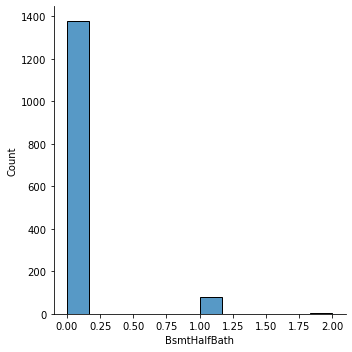

FullBath


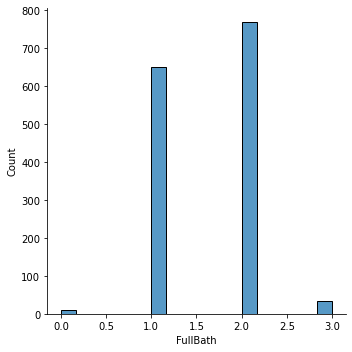

HalfBath


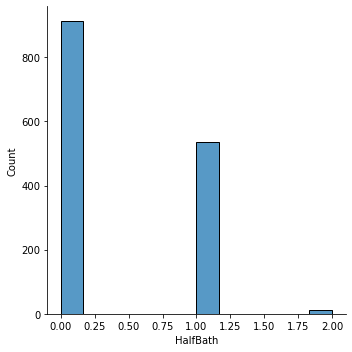

BedroomAbvGr


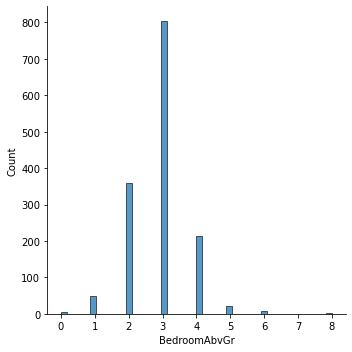

KitchenAbvGr


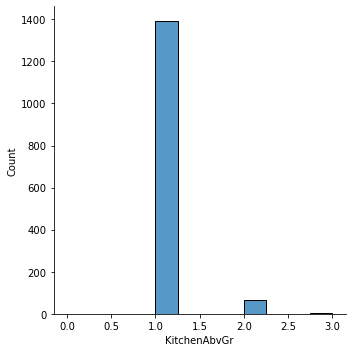

TotRmsAbvGrd


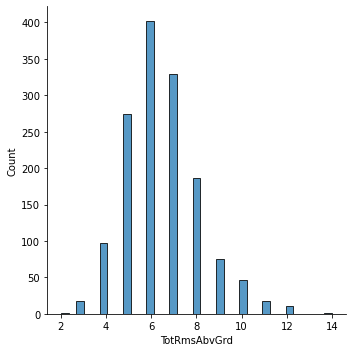

Fireplaces


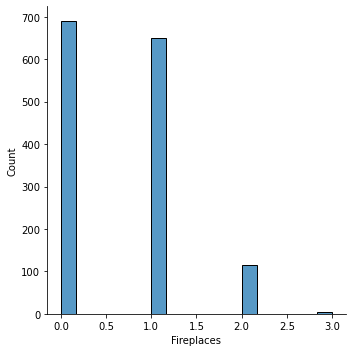

GarageYrBlt


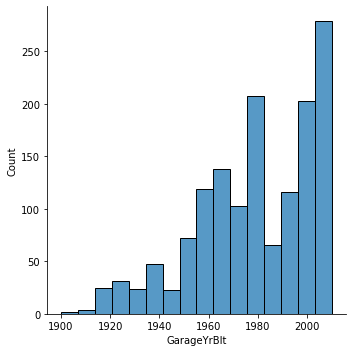

GarageCars


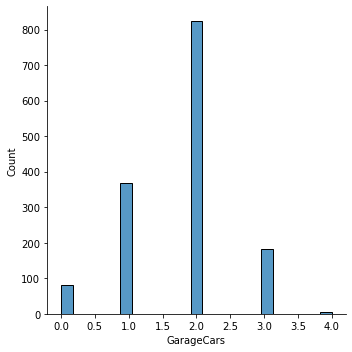

GarageArea


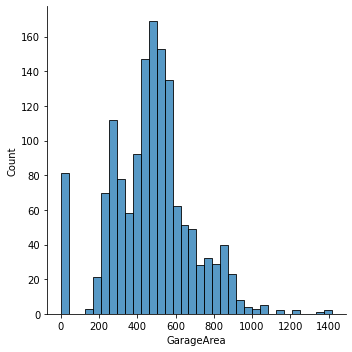

WoodDeckSF


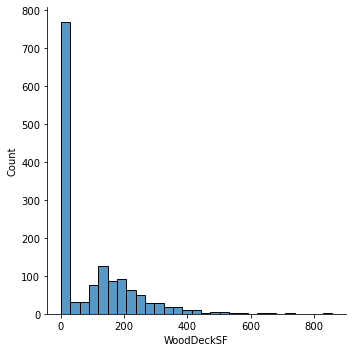

OpenPorchSF


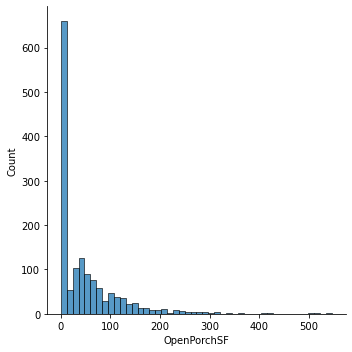

EnclosedPorch


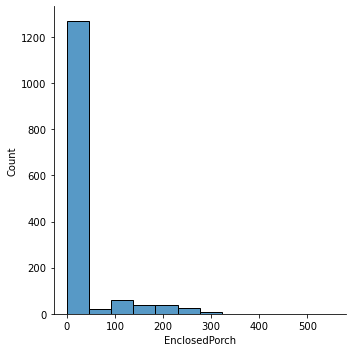

3SsnPorch


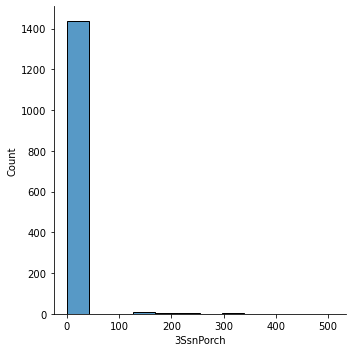

ScreenPorch


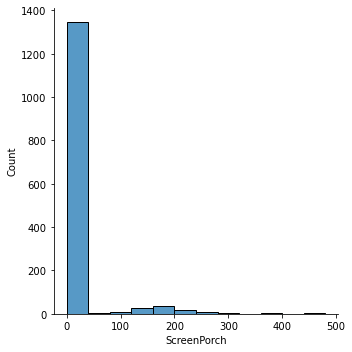

PoolArea


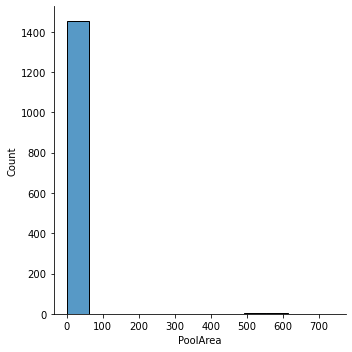

MiscVal


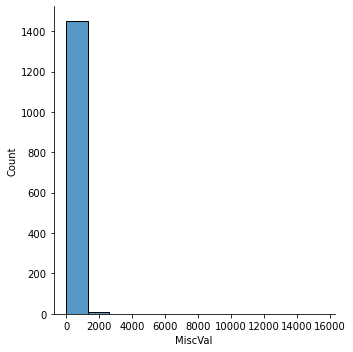

MoSold


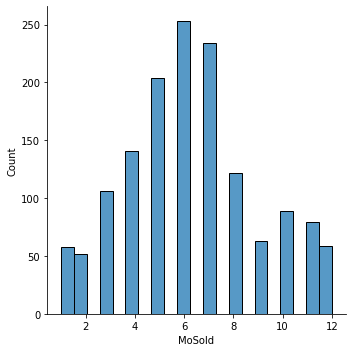

YrSold


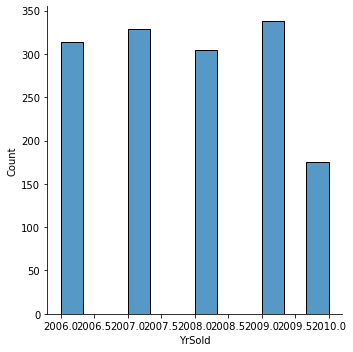

SalePrice


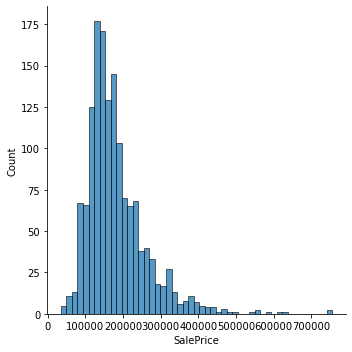

In [36]:
##Checking For Outliers in Numeric cols

plt.figure()
for  i in train_data.columns:
    if d_type_dict[i] == 'int64' or d_type_dict[i] == 'float64':
        print(i)
        sns.displot(x=train_data[i])
        plt.show()
        


In [37]:
df_train_data = train_data.copy()
df_test_data = test_data.copy()

# Feature Engineering

In [38]:
#Numerics
#Standardise : all_others except below and SalesPrice. 
#Min- : YearBuilt, GarageYrBlt, YrSold,YearRemodAdd
#Some numerics have skewed distribution , doing log transform to make log normal distribution
##Categories : get_dummies for all

In [39]:
df_train_data.shape , df_test_data.shape

((1460, 76), (1459, 75))

In [40]:
[c for c in df_train_data.columns if c not in df_test_data.columns]

['SalePrice']

In [41]:
df_train_data.tail(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,0,6,2008,WD,Normal,147500


In [42]:
df_test_data.tail(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1458,2919,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,0,11,2006,WD,Normal


In [43]:
df_all_data = pd.concat([df_train_data,df_test_data],axis='rows')
df_all_data.shape[0] - df_train_data.shape[0] - df_test_data.shape[0]

0

In [44]:
##Making Cateogies dummy vars
all_data_copy = df_all_data.copy()

df = pd.DataFrame()

for col in df_all_data.columns:
    if d_type_dict[col] == 'object':
        df = pd.get_dummies(all_data_copy[col],drop_first=False,prefix=col)
        print(f"Dropping {col} from Data.")
        all_data_copy.drop(col,inplace=True,axis='columns')
        all_data_copy = pd.concat([all_data_copy,df],axis=1)

print(f"Shape of Data before get_dummies:{df_all_data.shape}")
print(f"Shape of Data after get_dummies:{all_data_copy.shape}")

Dropping MSZoning from Data.
Dropping Street from Data.
Dropping LotShape from Data.
Dropping LandContour from Data.
Dropping Utilities from Data.
Dropping LotConfig from Data.
Dropping LandSlope from Data.
Dropping Neighborhood from Data.
Dropping Condition1 from Data.
Dropping Condition2 from Data.
Dropping BldgType from Data.
Dropping HouseStyle from Data.
Dropping RoofStyle from Data.
Dropping RoofMatl from Data.
Dropping Exterior1st from Data.
Dropping Exterior2nd from Data.
Dropping MasVnrType from Data.
Dropping ExterQual from Data.
Dropping ExterCond from Data.
Dropping Foundation from Data.
Dropping BsmtQual from Data.
Dropping BsmtCond from Data.
Dropping BsmtExposure from Data.
Dropping BsmtFinType1 from Data.
Dropping BsmtFinType2 from Data.
Dropping Heating from Data.
Dropping HeatingQC from Data.
Dropping CentralAir from Data.
Dropping Electrical from Data.
Dropping KitchenQual from Data.
Dropping Functional from Data.
Dropping GarageType from Data.
Dropping GarageFinish 

#### Numerical Columns

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
year_cols = ['YearBuilt', 'GarageYrBlt', 'YrSold','YearRemodAdd']
all_numer_cols = [i for i in d_type_dict.keys() if d_type_dict[i] != 'object' and i not in ('Id','SalePrice')]
log_scaler_cols = ['MiscVal', 'PoolArea', 'LotArea','LowQualFinSF']
for col in df_all_data.columns:
    if d_type_dict[col] != 'object':
        if col in all_numer_cols and col not in year_cols and col not in log_scaler_cols:
            all_data_copy[col] = scaler.fit_transform(all_data_copy[[col]])
        elif col in year_cols:
            all_data_copy[col] = all_data_copy[col] - all_data_copy[col].min()
        elif col in log_scaler_cols:
            all_data_copy[col] = np.log10(all_data_copy[col]+1)

all_data_copy.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_Others,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,Condition2_Norm,Condition2_Others,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Others,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Others,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Others,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.235294,0.150685,3.926908,0.666667,0.500,131,53,0.12250,0.125089,0.0,0.064212,0.140098,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,108.0,0.4,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,2,208500.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1,2,0.000000,0.202055,3.982316,0.555556,0.875,104,26,0.00000,0.173281,0.0,0.121575,0.206547,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,81.0,0.4,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,1,181500.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0

In [47]:
df_all_data = all_data_copy.copy()

##Preprocessing End.

In [48]:
#### Separate Initial Train  and Test
df_train = df_all_data.iloc[:1460]
df_test = df_all_data.iloc[1460:]

df_train.tail(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_Others,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,Condition2_Norm,Condition2_Others,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Others,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Others,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Others,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,1456,0.235294,0.140411,3.898615,0.555556,0.500,127,50,0.000000,0.000000,0.000000,0.407962,0.155974,0.130015,0.336077,0.0,0.247362,0.000000,0.0,0.50,0.5,0.375,0.333333,0.384615,0.25,104.0,0.4,0.309140,0.000000,0.053908,0.000000,0.0,0.0,0.0,0.000000,0.636364,1,175000.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1456,1457,0.000000,0.219178,4.119784,0.555556,0.625,106,38,0.074375,0.139972,0.106815,0.252140,0.252373,0.365259,0.000000,0.0,0.327619,0.333333,0.0,0.50,0.0,0.375,0.333333,0.384615,0.50,83.0,0.4,0.336022,0.245084,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.090909,4,210000.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [49]:
df_test.tail(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_Others,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_Others,Condition1_PosN,Condition1_RRAn,Condition2_Norm,Condition2_Others,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,...,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Others,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Others,Functional_Typ,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_Others,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Others,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_Others,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1454,2915,0.823529,0.000000,3.287130,0.333333,0.75,98,20,0.00000,0.000000,0.0,0.233733,0.089362,0.044528,0.264407,0.0,0.142803,0.000000,0.0,0.25,0.5,0.375,0.333333,0.230769,0.00,84.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.454545,0,NaN,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
1455,2916,0.823529,0.000000,3.277609,0.333333,0.50,98,20,0.00000,0.044649,0.0,0.125856,0.089362,0.044528,0.264407,0.0,0.142803,0.000000,0.0,0.25,0.5,0.375,0.333333,0.307692,0.00,75.0,0.2,0.192204,0.000000,0.032345,0.0,0.0,0.0,0.0,0.000000,0.272727,0,NaN,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,

In [50]:
df_test.drop('SalePrice',axis=1,inplace=True)

C:\ProgramData\Anaconda3_8\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
df_test.shape , df_train.shape

((1459, 230), (1460, 231))

In [52]:
df_test.to_csv('../data/processed_test_data.csv',index=False)
df_train.to_csv('../data/processed_train_data.csv',index=False)
df_test.drop('Id',axis=1,inplace=True)
df_train.drop('Id',axis=1,inplace=True)


# Modelling

In [53]:
X ,y = df_train[[c for c in df_train.columns if c != 'SalePrice']] , df_train.SalePrice


In [ ]:
#y_test_meta.isna().sum()

In [54]:
## Divide data for Meta Models
from sklearn.model_selection import train_test_split

X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(X,y,test_size=0.2,random_state=45,shuffle=True)
X_train_meta.shape,X_test_meta.shape,y_train_meta.shape,y_test_meta.shape

((1168, 229), (292, 229), (1168,), (292,))

In [55]:
'''
X_train_meta , y_train_meta: This data will be used for making models and then make the meta model
X_test_meta,y_test_meta : This will be used to test meta_model
'''
meta_data = pd.DataFrame()

In [56]:
from sklearn.model_selection import KFold

import xgboost
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

ridge_reg = Ridge(alpha=25)

xgb_reg = xgboost.XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


gbm_reg = GradientBoostingRegressor(max_depth=5,learning_rate=0.1,n_estimators=200)


rf_reg = RandomForestRegressor(n_estimators=150)



In [57]:
rmse_ridge = cross_val_score(ridge_reg, X_train_meta,y_train_meta,cv=5,scoring='neg_root_mean_squared_error')
print(rmse_ridge.min(),rmse_ridge.mean(),rmse_ridge.max())

-43832.09377374515 -35083.46169069291 -26178.121207925433


In [58]:
ridge_reg.fit(X_train_meta,y_train_meta)

Ridge(alpha=25)

In [59]:
rmse_xgboost = cross_val_score(xgb_reg, X_train_meta,y_train_meta,cv=5,scoring='neg_root_mean_squared_error')
print(rmse_xgboost.min(),rmse_xgboost.mean(),rmse_xgboost.max())

-49278.6392903639 -32449.96035655593 -24615.233835169238


In [60]:
xgb_reg.fit(X_train_meta,y_train_meta)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
#gbm_reg
rmse_gbm = cross_val_score(gbm_reg, X_train_meta,y_train_meta,cv=5,scoring='neg_root_mean_squared_error')
print(rmse_gbm.min(),rmse_gbm.mean(),rmse_gbm.max())


-48575.53092585472 -33222.76404452141 -23141.317639748795


In [62]:
gbm_reg.fit(X_train_meta,y_train_meta)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

In [63]:
#random Forest reg
rmse_rf = cross_val_score(rf_reg, X_train_meta,y_train_meta,cv=5,scoring='neg_root_mean_squared_error')
print(rmse_rf.min(),rmse_rf.mean(),rmse_rf.max())


-47308.91471093562 -33688.18665335585 -25255.363737673848


In [64]:
rf_reg.fit(X_train_meta,y_train_meta)

RandomForestRegressor(n_estimators=150)

In [65]:
#meta data will be data frame the predictions of all models 
meta_data['ridge'] = ridge_reg.predict(X_test_meta)
meta_data['xgboost'] = xgb_reg.predict(X_test_meta)
meta_data['gbm'] = gbm_reg.predict(X_test_meta)
meta_data['rf'] = rf_reg.predict(X_test_meta)
meta_data['AvgSalePrice'] = meta_data[[c for c in ['ridge','rf','gbm','xgboost']]].mean(axis=1)
meta_data['SalePrice'] = y_test_meta.values

In [66]:
meta_data.head()

,ridge,xgboost,gbm,rf,AvgSalePrice,SalePrice
0,174126.331509,163796.203125,159762.054666,164080.853333,165441.360658,164700.0
1,142133.618186,116201.523438,122062.345218,114998.100000,123848.896710,116000.0
2,323241.930493,305299.562500,304466.450959,317509.333333,312629.319321,266000.0
3,278138.179386,259862.968750,272100.451412,280619.646667,272680.311554,258000.0
4,265050.581212,216556.062500,226329.124834,220405.460000,232085.307136,190000.0


In [67]:
meta_data.to_csv('../output/test_preds.csv',index=False)

In [68]:


[c for c in X_train_meta.columns if c not in df_test.columns]

[]

In [69]:
meta_data_out = pd.DataFrame()

meta_data_out['ridge'] = ridge_reg.predict(df_test)
meta_data_out['xgboost'] = xgb_reg.predict(df_test)
meta_data_out['gbm'] = gbm_reg.predict(df_test)
meta_data_out['rf'] = rf_reg.predict(df_test)
meta_data_out['SalePrice'] = meta_data_out[[c for c in ['ridge','rf','gbm','xgboost']]].mean(axis=1)

meta_data_out.head()

,ridge,xgboost,gbm,rf,SalePrice
0,107098.630458,119584.625000,124829.645555,127278.326667,119697.806920
1,149205.746363,156879.812500,162118.910439,152471.213333,155168.920659
2,185412.552643,172192.484375,183226.562201,183415.140000,181061.684805
3,196945.715271,187722.015625,192933.634188,184791.520000,190598.221271
4,188355.148762,190846.343750,192500.098850,201507.486667,193302.269507


In [70]:
meta_data_out.shape

(1459, 5)

In [71]:
submission = pd.concat([test_data.Id,meta_data_out.SalePrice],axis=1)
submission.to_csv('meta_model_submission_avg002.csv',index=False)

In [ ]:
meta_data.to_csv('../data/All_preds.csv',index=False)

In [72]:
# Intercept	-3855.628904
# ridge	0.474196255
# xgboost	0.292803334
# gbm	0.52961953
# rf	-0.290445976

meta_data_out['SalePrice1'] =0.246546283 * meta_data_out.ridge + 0.246521178 * meta_data_out.xgboost + 0.246510226 * meta_data_out.gbm + 0.246510223 * meta_data_out.rf

In [73]:
meta_data_out.head()

,ridge,xgboost,gbm,rf,SalePrice,SalePrice1
0,107098.630458,119584.625000,124829.645555,127278.326667,119697.806920,118032.104659
1,149205.746363,156879.812500,162118.910439,152471.213333,155168.920659,153009.999532
2,185412.552643,172192.484375,183226.562201,183415.140000,181061.684805,178542.797746
3,196945.715271,187722.015625,192933.634188,184791.520000,190598.221271,187946.799748
4,188355.148762,190846.343750,192500.098850,201507.486667,193302.269507,190612.824220


In [ ]:
submission = pd.concat([test_data.Id,meta_data_out.SalePrice1],axis=1)
submission.rename(columns={'SalePrice1':'SalePrice'},inplace=True)
submission.head()
submission.to_csv('../output/meta_model_submission_SOLVER003.csv',index=False)